In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

## __1 - Business Problem__  
___Predict Price of the computer___  

## __2 - Data collection and description__ 

In [5]:
df = pd.read_csv("F:\Data Science\Assignment\Multi Linear Regression\Data\Computer_Data.csv")

In [6]:
df1 = df[['price','speed','hd','ram','screen','cd','multi','premium','ads','trend']]

In [7]:
df1

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1499,25,80,4,14,no,no,yes,94,1
1,1795,33,85,2,14,no,no,yes,94,1
2,1595,25,170,4,15,no,no,yes,94,1
3,1849,25,170,8,14,no,no,no,94,1
4,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,no,no,yes,39,35
6255,2223,66,850,16,15,yes,yes,yes,39,35
6256,2654,100,1200,24,15,yes,no,yes,39,35
6257,2195,100,850,16,15,yes,no,yes,39,35


In [8]:
df1.describe

<bound method NDFrame.describe of       price  speed    hd  ram  screen   cd multi premium  ads  trend
0      1499     25    80    4      14   no    no     yes   94      1
1      1795     33    85    2      14   no    no     yes   94      1
2      1595     25   170    4      15   no    no     yes   94      1
3      1849     25   170    8      14   no    no      no   94      1
4      3295     33   340   16      14   no    no     yes   94      1
...     ...    ...   ...  ...     ...  ...   ...     ...  ...    ...
6254   1690    100   528    8      15   no    no     yes   39     35
6255   2223     66   850   16      15  yes   yes     yes   39     35
6256   2654    100  1200   24      15  yes    no     yes   39     35
6257   2195    100   850   16      15  yes    no     yes   39     35
6258   2490    100   850   16      17  yes    no     yes   39     35

[6259 rows x 10 columns]>

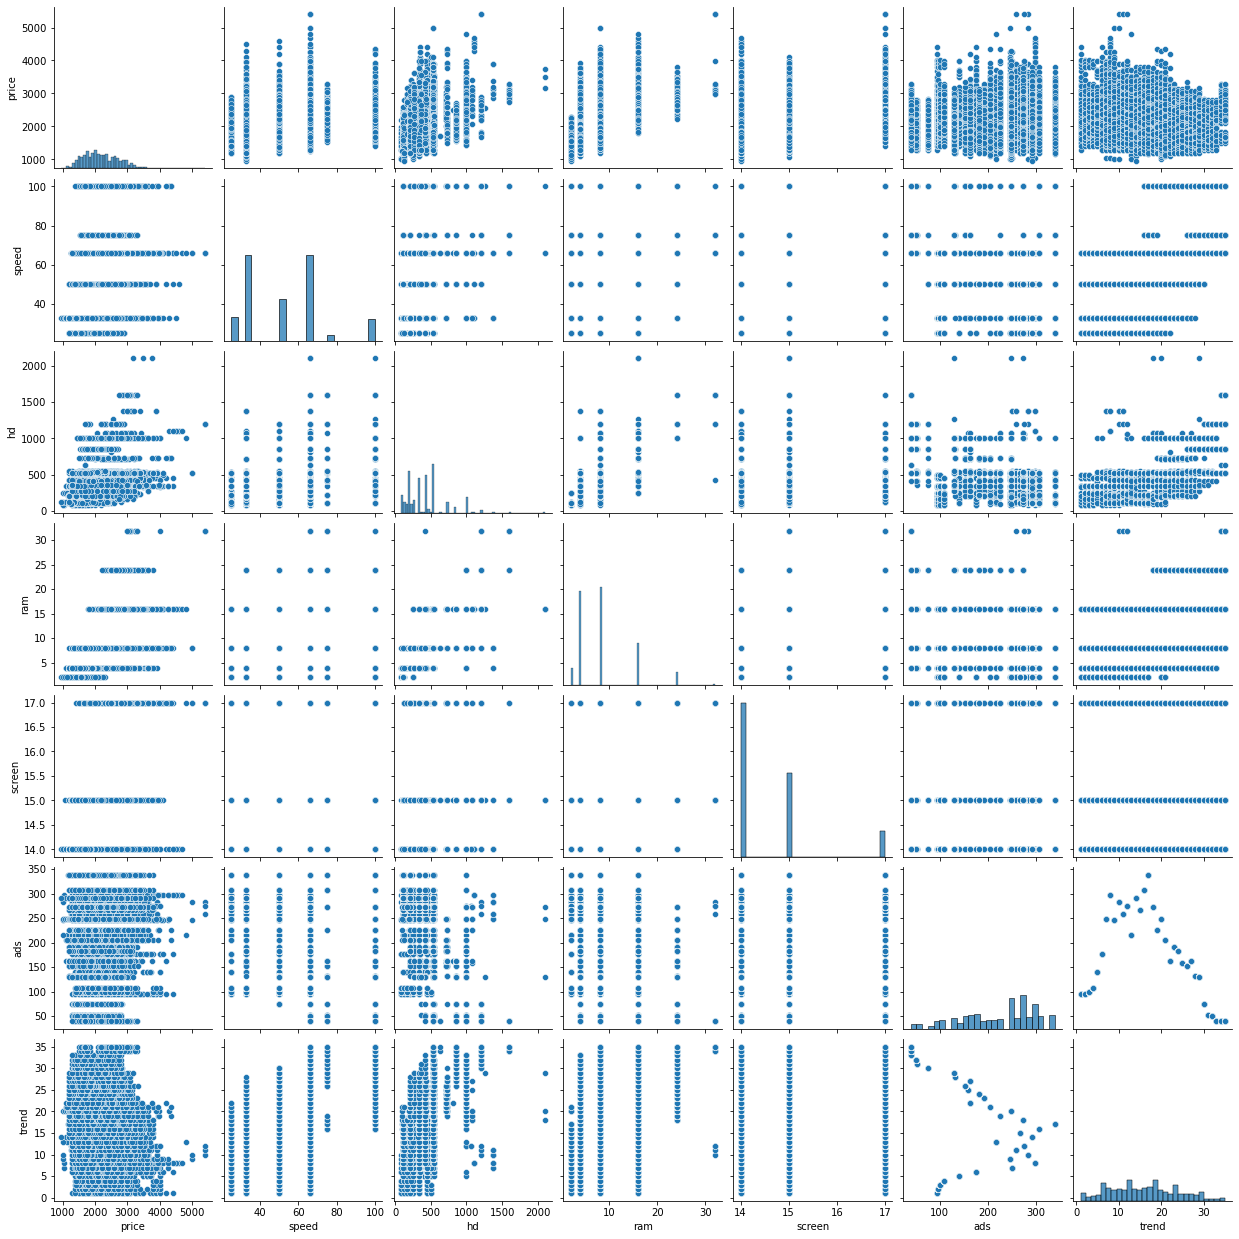

In [9]:
sns.pairplot(df1)

## __3 - Correlation Matrix__ 

In [10]:
corrMatrix = df1.corr()

<AxesSubplot:>

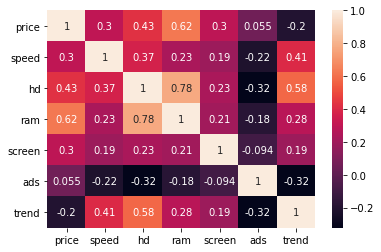

In [11]:
sns.heatmap(corrMatrix, annot=True)

## __4 - Regression Model__ 

In [12]:
df1 ['cd'] = df1 ['cd'].map({'yes': 1, 'no': 0})

<ipython-input-12-3eaeacb5613a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1 ['cd'] = df1 ['cd'].map({'yes': 1, 'no': 0})


In [13]:
df1 ['multi'] = df1 ['multi'].map({'yes': 1, 'no': 0})

<ipython-input-13-0d8aa705cf70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1 ['multi'] = df1 ['multi'].map({'yes': 1, 'no': 0})


In [14]:
df1 ['premium'] = df1 ['premium'].map({'yes': 1, 'no': 0})

<ipython-input-14-0c0bf3363c56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1 ['premium'] = df1 ['premium'].map({'yes': 1, 'no': 0})


In [35]:
X = df1[['speed','hd','ram','screen','cd','multi','premium','ads','trend']]
Y = df1[['price']]

In [36]:
model = sm.OLS(Y, X.astype(float)).fit()
predictions = model.predict(X)

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          4.740e+04
Date:                Thu, 26 Mar 2020   Prob (F-statistic):                        0.00
Time:                        17:12:11   Log-Likelihood:                         -44052.
No. Observations:                6259   AIC:                                  8.812e+04
Df Residuals:                    6250   BIC:                                  8.818e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
speed          9.3310      0.185     50.325      0.000       8.968       9.695
hd             0.7786      0.028     28.146      0.000       0.724       0.833
ram           48.0928      1.068     45.042      0.000      46.000      50.186
screen       142.1451      1.435     99.043      0.000     139.332     144.959
cd            56.3969      9.493      5.941      0.000      37.787      75.007
multi        106.5261     11.427      9.322      0.000      84.125     128.928
premium     -494.9547     12.045    -41.091      0.000    -518.568    -471.342
ads            0.7292      0.049     14.748      0.000       0.632       0.826
trend        -51.6160      0.628    -82.153      0.000     -52.848     -50.384
==============================================================================
Omnibus:                      993.429   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2966.136
Skew:                           0.831   Prob(JB):                         0.00
Kurtosis:                       5.935   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R sq and p Value of the Model is Good and the model can be accepted. Also the Variables had p Value less than 0.1, thus we all the independent variables are essential to predict the price

## __5 - Output Interpretation__ 

1 - p-value < 0.01  
Thus the model is accepted

2 - coefficient == 9.33  
Thus if the value of x increased by 1, the predicted value of Price will increase by 9.33

3 - Adj. R-sqared == 0.97  
Thus the model explains 97% of the variance in dependent variable